<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/speed.png?raw=true" width=800 align="left"/>

# 실습 내용

- Cars 데이터를 불러와 살펴봅니다.
- 단순 선형회귀 모델을 만들고 평가합니다.
- 특히 회귀 계수를 명확히 이해합니다.
- 예측 결과를 시각화합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/cars.csv'
path = 'https://bit.ly/CarsFile'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [4]:
# 하위 몇 개 행 확인
data.tail()

,speed,dist
45,24,70
46,24,92
47,24,93
48,24,120
49,25,85


In [5]:
# 기술통계 확인
data.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [6]:
# NaN 값 확인
data.isnull().sum()

speed    0
dist     0
dtype: int64

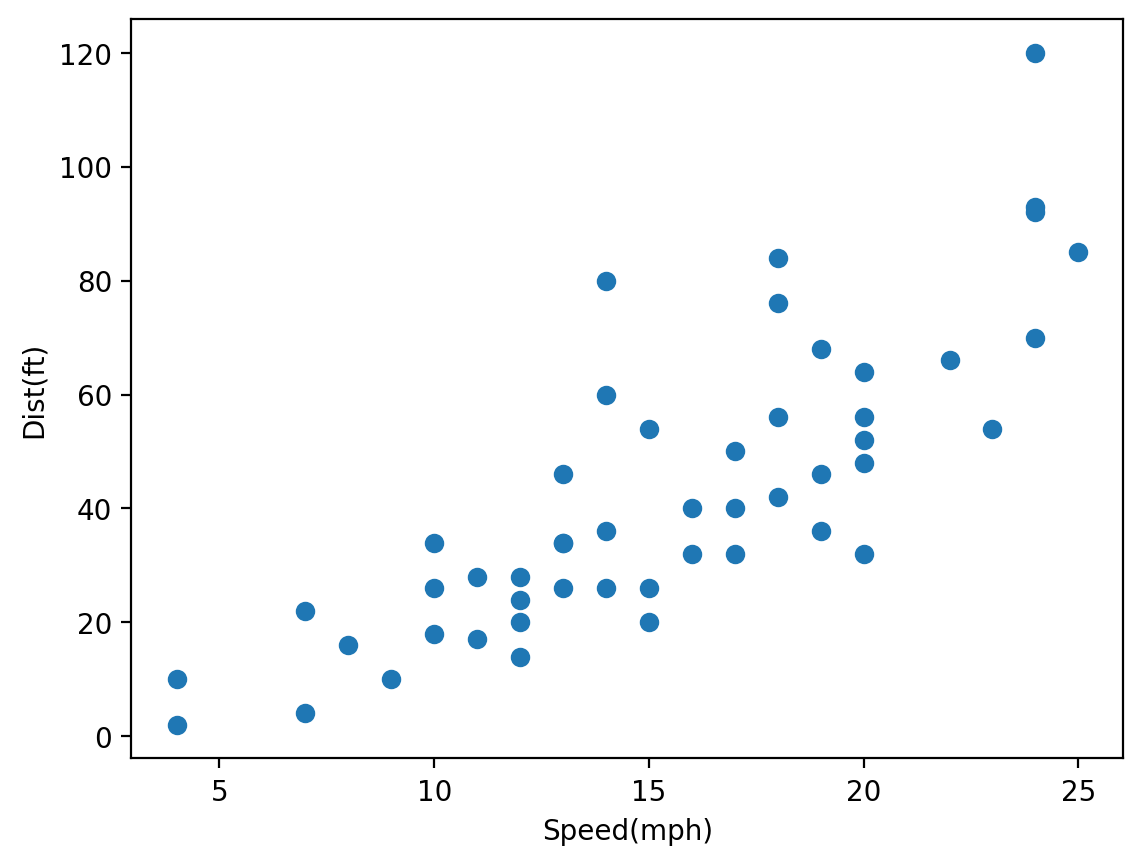

In [7]:
# speed, dist 관계
plt.scatter(x='speed', y='dist', data=data)
plt.xlabel('Speed(mph)')
plt.ylabel('Dist(ft)')
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [8]:
# target 확인
target = 'dist'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [9]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [13]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [11]:
# 2단계: 선언하기
model = LinearRegression()

In [12]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [14]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [15]:
# 5단계: 평가하기
print("MAE :",mean_absolute_error(y_test, y_pred))
print('r2 :', r2_score(y_test, y_pred))

MAE : 15.113442990354987
r2 : 0.5548332681132087


- 회귀 계수를 살펴봅니다.

In [16]:
# 회귀계수 확인
print(model.coef_)
print(model.intercept_)

[3.91046344]
-16.373364149357656


$$ \large Distance = 3.91 * speed - 16.37 $$

# 5.기타

- 기타 필요한 내용이 있으면 진행합니다.

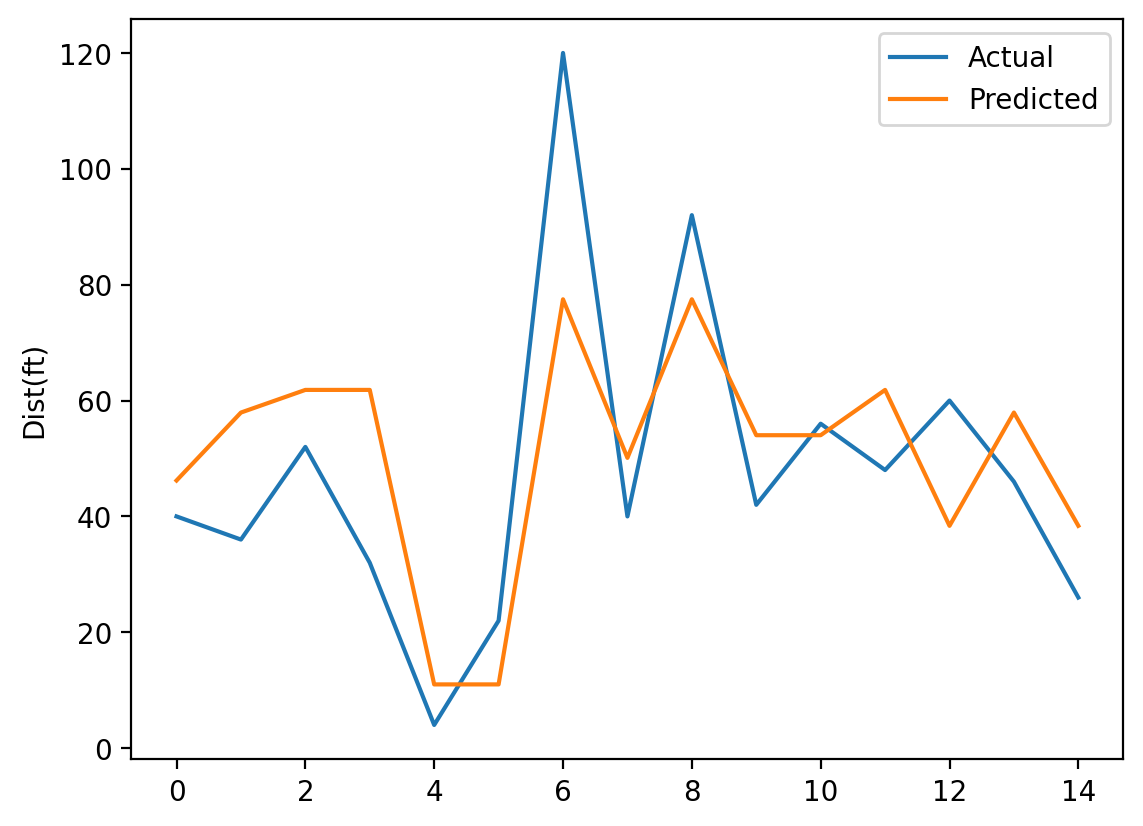

In [17]:
# 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.ylabel('Dist(ft)')
plt.show()

In [22]:
np.linspace(1, 10, 5)

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [23]:
# 회귀식 만들기
a = model.coef_
b = model.intercept_
# x
speed = np.linspace(x_test.min(), x_test.max(), 5)
# y
dist = speed * a + b

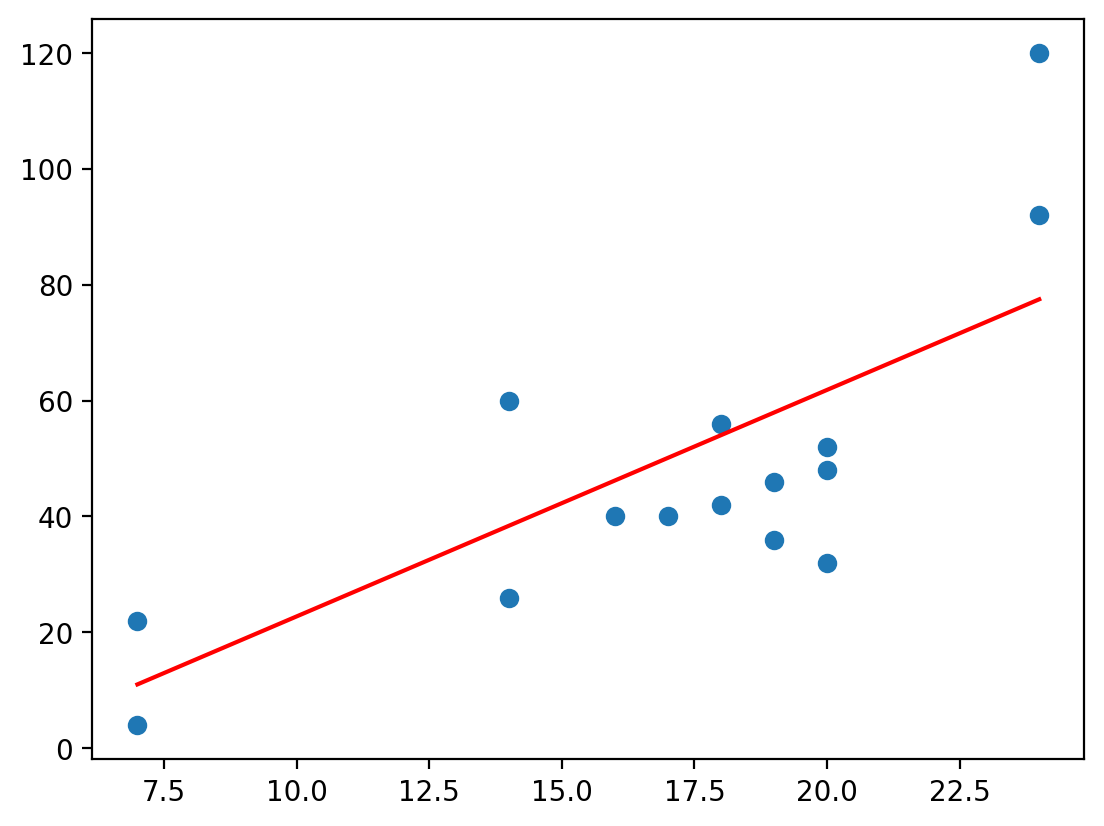

In [24]:
# 시각화
plt.scatter(x_test['speed'], y_test.values)
plt.plot(speed, dist, c='r')
plt.show()

<Axes: xlabel='speed'>

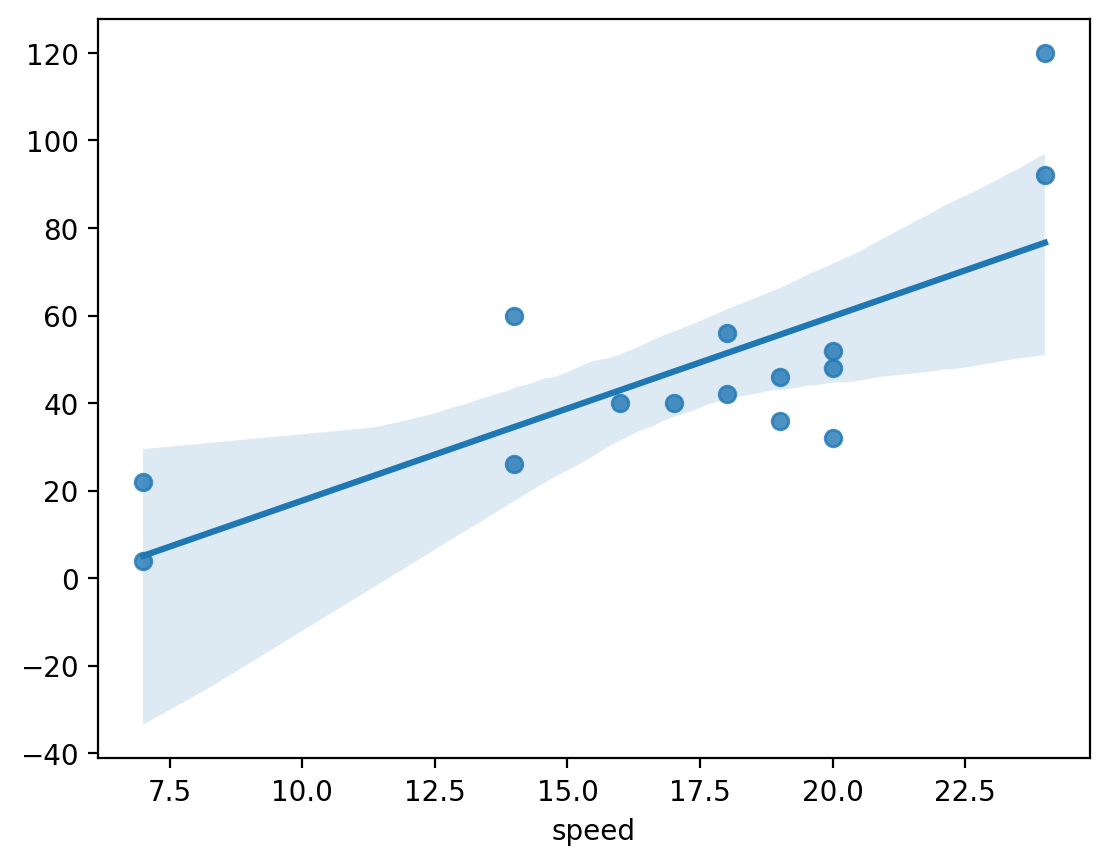

In [28]:
sns.regplot(x=x_test['speed'], y=y_test.values)